### 목표 : 부족한 피쳐를 조합 생성하여 모델 성능 향상
- 특성공학 => 피쳐 추출/선택/생성
- 비선형의 데이터에 대한 피쳐 생성 ==> 곡선형태의 회귀선 수식
- 모듈 : sklearn.preprocessing 내에 포함
- 데이터 : fish.csv
- 피쳐 : Perch의 Height, Length, Width
- 타겟 : Perch의 Weight
- 학습유형 : 지도학습

### (1) 전처리 피쳐 조합 생성 살펴보기

In [168]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, RobustScaler

In [169]:
# 인스턴스 생성
poly = PolynomialFeatures() #degree default는 2차원

In [170]:
poly.fit([[2,3]])

PolynomialFeatures()

In [171]:
poly.transform([[2,3]])
# 1,2,3,4,6,9
# 1,a,b,a^2, ab, b^2

array([[1., 2., 3., 4., 6., 9.]])

In [172]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
poly.transform([[2,3]])
# 2,3,4,6,9    # 1값 사라짐
# a,b,a^2, ab, b^2

array([[2., 3., 4., 6., 9.]])

In [173]:
# 인스턴스 생성
poly = PolynomialFeatures(include_bias=False,degree=5) #include=False라서 1 제외
poly.fit([[2,3]])
poly.transform([[2,3]]) # a=2, b=3
# 2,3,4,6,9,8,12,18,27,16,24,36,54,81,32,48,72,108,162,243
# degree=5 => 5차항까지 구하기
# 1차항 a,b,
# 2차항 a^2,ab,b^2,
# 3차항 a^3,a^2*b,a*b^2,b^3,
# 4차항 a^4,a^3*b,a^2*b^2,a*b^3,b^4
# 5차항 a^5,a^4*b,a^3*b^2,a^2*b^3,a^b^4,b^5

array([[  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.,  16.,  24.,
         36.,  54.,  81.,  32.,  48.,  72., 108., 162., 243.]])

In [174]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5'],
      dtype=object)

### [2] Perch 데이터를 최대한 만족하는 회귀선을 찾기

#### [2-1] 모듈로딩 및 데이터 준비 <hr>

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [176]:
data_file = '../data/fish.csv'
fishDF = pd.read_csv(data_file, usecols=[0,1,2,4,5])

fishDF

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340
...,...,...,...,...,...
154,Smelt,12.2,12.2,2.0904,1.3936
155,Smelt,13.4,12.4,2.4300,1.2690
156,Smelt,12.2,13.0,2.2770,1.2558
157,Smelt,19.7,14.3,2.8728,2.0672


In [177]:
perchDF = fishDF[fishDF.Species == 'Perch'].copy()
perchDF.drop(['Species'], axis=1, inplace=True)
perchDF.reset_index(drop=True, inplace=True)
perchDF

,Weight,Length,Height,Width
0,5.9,8.4,2.1120,1.4080
1,32.0,13.7,3.5280,1.9992
2,40.0,15.0,3.8240,2.4320
3,51.5,16.2,4.5924,2.6316
4,70.0,17.4,4.5880,2.9415
5,100.0,18.0,5.2224,3.3216
6,78.0,18.7,5.1992,3.1234
7,80.0,19.0,5.6358,3.0502
8,85.0,19.6,5.1376,3.0368
9,85.0,20.0,5.0820,2.7720


In [178]:
perchDF.head(2)

,Weight,Length,Height,Width
0,5.9,8.4,2.112,1.4080
1,32.0,13.7,3.528,1.9992


#### [2-2] 데이터 확인 <hr>
- 학습 유형 결정 위한 단계
- 피쳐 스케일링 진행 여부 체크

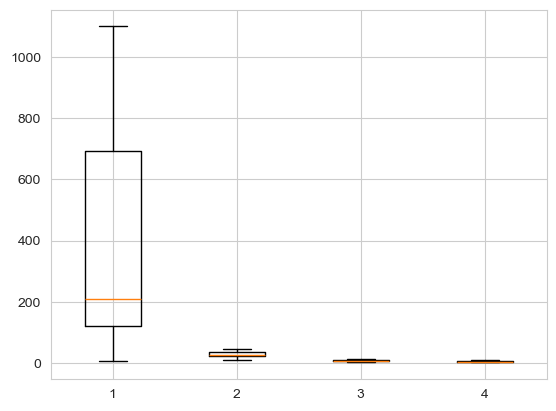

In [179]:
plt.boxplot(perchDF)
plt.show()

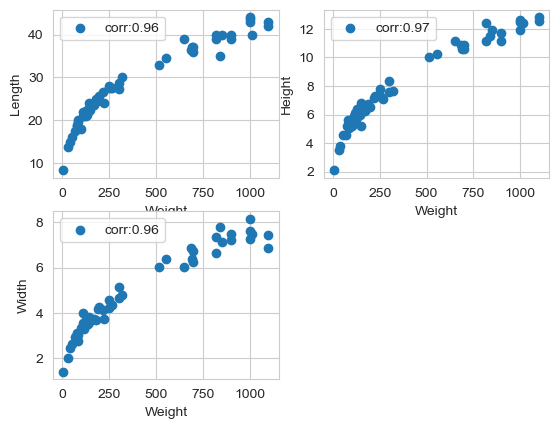

In [180]:
def print_feature(nrows, ncols, df, target, features,corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target],df[features[idx]], label=f'corr:{corrs[idx]:.2}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout
    plt.show()
    
# print_feature(2,2, perchDF, fishDF.Weight, perchDF[1:])
# 
corrList = perchDF.corr()['Weight'].to_list()
print_feature(2,2, perchDF, perchDF.columns[0], perchDF.columns[1:], corrList[1:])


In [181]:
from sklearn.model_selection import train_test_split

featureDF = perchDF[perchDF.columns[1:]]
targetDF = perchDF.Weight

X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    random_state=22,
                                                    test_size=0.3)

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fLinearTrainScore(X_train, X_test, y_train, y_test):
    '''
    model : 모델 객체 선형
    ScalerList : 스케일러 종류
    scaler : 스케일링 인수 획득 - 평균, 표준편차 등 획득
    STD : 평균 0, 편차 1, MM : 최소 0, 최대 1, RB : 중앙값0, IQR 1,
    train, test : 스케일링 진행 - 스케일링 인수 활용
    model.fit : 모델에 스케일링 값 학습
    train_score, test_score : 모델의 점수 평가
    return scaler
    '''
    model = LinearRegression()
    ScalerList = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    for idx, i in enumerate(ScalerList):
        scaler = i
        scaler.fit(X_train)
        train = scaler.transform(X_train)
        test = scaler.transform(X_test)
        model.fit(train, y_train)
        train_score = model.score(train, y_train)
        test_score = model.score(test, y_test)
        pred_test = model.predict(test)
        print(f'{idx+1}) {i} : Train_score : {train_score*100:.3f}% --- Test Score : {test_score*100:.3f}%', end=' ')
        print(f'\t Fit :  {(test_score-train_score)*100:.3f}%', end='')
        if train_score > test_score:
            print('(과대적합)')
        elif test_score<50 and train_score < 50:
            print('(과소적합)')
        else:
            print()
        print(f'\tPredict_score : {test_score*100:.3f}%')
        print()

        # y_pre = model.predict(targetDF)
        # y_pre = np.round(y_pre,1)
        # y_pre
        
        # r2_score(perchDF.Length, y_pre)
        # mean_squared_error(perchDF.Length, y_pre)
        # mean_squared_error(perchDF.Length, y_pre, squared=False)
        # mean_absolute_error(perchDF.Length, y_pre)
        # print(f'MSE : {mean_squared_error(targetDF, y_pre)}')
        # print(f'RMSE : {mean_squared_error(targetDF, y_pre, squared=False)}')
        # print(f'MAE : {mean_absolute_error(targetDF, y_pre)}')




fLinearTrainScore(X_train, X_test, y_train, y_test)

1) StandardScaler() : Train_score : 94.368% --- Test Score : 92.764% 	 Fit :  -1.604%(과대적합)
	Predict_score : 92.764%

2) MinMaxScaler() : Train_score : 94.368% --- Test Score : 92.764% 	 Fit :  -1.604%(과대적합)
	Predict_score : 92.764%

3) RobustScaler() : Train_score : 94.368% --- Test Score : 92.764% 	 Fit :  -1.604%(과대적합)
	Predict_score : 92.764%


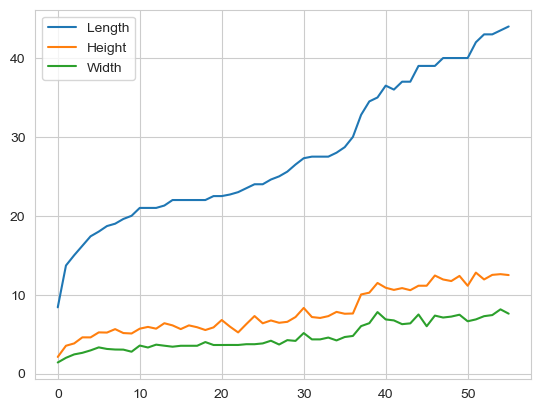

In [223]:
plt.plot(featureDF, label=perchDF.columns[1:])
plt.legend()
plt.show()

In [199]:
# 인스턴스 생성
perchDF
poly_featureDF = perchDF[perchDF.columns[1:]]
poly_targetDF = perchDF.Weight

poly = PolynomialFeatures(include_bias=False,degree=2)
poly.fit(poly_featureDF)
poly_perchDF=poly.transform(poly_featureDF)
poly_perchDF

# poly_perchDF = pd.DataFrame(poly_perchDF)

array([[8.40000000e+00, 2.11200000e+00, 1.40800000e+00, 7.05600000e+01,
        1.77408000e+01, 1.18272000e+01, 4.46054400e+00, 2.97369600e+00,
        1.98246400e+00],
       [1.37000000e+01, 3.52800000e+00, 1.99920000e+00, 1.87690000e+02,
        4.83336000e+01, 2.73890400e+01, 1.24467840e+01, 7.05317760e+00,
        3.99680064e+00],
       [1.50000000e+01, 3.82400000e+00, 2.43200000e+00, 2.25000000e+02,
        5.73600000e+01, 3.64800000e+01, 1.46229760e+01, 9.29996800e+00,
        5.91462400e+00],
       [1.62000000e+01, 4.59240000e+00, 2.63160000e+00, 2.62440000e+02,
        7.43968800e+01, 4.26319200e+01, 2.10901378e+01, 1.20853598e+01,
        6.92531856e+00],
       [1.74000000e+01, 4.58800000e+00, 2.94150000e+00, 3.02760000e+02,
        7.98312000e+01, 5.11821000e+01, 2.10497440e+01, 1.34956020e+01,
        8.65242225e+00],
       [1.80000000e+01, 5.22240000e+00, 3.32160000e+00, 3.24000000e+02,
        9.40032000e+01, 5.97888000e+01, 2.72734618e+01, 1.73467238e+01,
        1.1

In [198]:
# poly_featureDF = poly_perchDF[poly_perchDF.columns[1:]]
# poly_targetDF = poly_perchDF[poly_perchDF.columns[0]]

poly_X_train, poly_X_test, poly_y_train, poly_y_test = train_test_split(poly_perchDF,
                                                    targetDF,
                                                    random_state=22,
                                                    test_size=0.3)

fLinearTrainScore(poly_X_train, poly_X_test, poly_y_train, poly_y_test)

1) StandardScaler() : Train_score : 99.443% --- Test Score : 96.825% 	 Fit :  -2.618%(과대적합)
	Predict_score : 96.825%
2) MinMaxScaler() : Train_score : 99.443% --- Test Score : 96.825% 	 Fit :  -2.618%(과대적합)
	Predict_score : 96.825%
3) RobustScaler() : Train_score : 99.443% --- Test Score : 96.825% 	 Fit :  -2.618%(과대적합)
	Predict_score : 96.825%


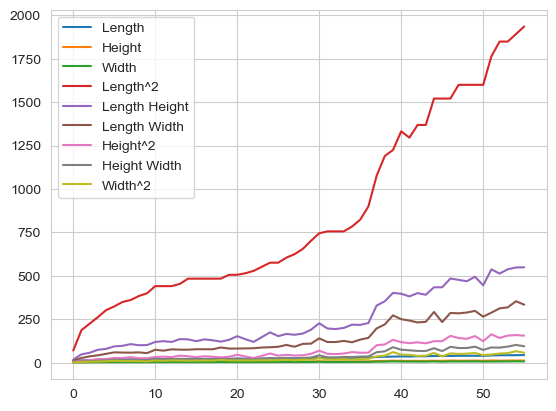

In [212]:
plt.plot(poly_perchDF, label=poly.get_feature_names_out())
plt.legend()
plt.show()